<a href="https://colab.research.google.com/github/DanielCortez94/PROYECTS/blob/main/HR_Analysis_of_Personnel_Turnover_in_a_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT: Analysis of Personnel Turnover in a Company

##Library loading and Data Upload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from math import ceil
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv('HR_Analyticscsv.csv', sep=',', na_values='#N/D')
df

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0


##Data Analytics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [ ]:
# Check the number of null values
df.isnull().sum().sort_values(ascending=False)

,0
YearsWithCurrManager,57
RelationshipSatisfaction,0
SalarySlab,0
MonthlyRate,0
NumCompaniesWorked,0
Over18,0
OverTime,0
PercentSalaryHike,0
PerformanceRating,0
StandardHours,0


Conclusions:
- 'YearsWithCurrManager' has too many nulls (impute data)
- 'EmpID' and 'EmployeeNumber' are irrelevant

In [ ]:
# Delete the unnecessary columns to obtain insights
df.drop(columns=['EmpID','EmployeeNumber'], inplace = True)
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,80,0,0,2,3,0,0,0,0.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,...,1,80,0,0,2,3,0,0,0,0.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,4,80,0,0,3,3,0,0,0,0.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,4,80,0,0,2,3,0,0,0,0.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,4,80,0,33,5,1,29,8,11,10.0
1476,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,...,4,80,0,22,5,4,18,13,13,11.0
1477,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,...,4,80,0,10,1,3,2,2,2,2.0
1478,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,1,...,2,80,1,12,3,3,11,7,1,9.0


###EDA OF CATEGORICAL VARIABLES

In [ ]:
#Define the function to create the graphs of the categorical data
def graphics_eda(cat):
    #Calculate the number of rows we need
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #Define the graph
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    #Flatten to iterate through the graph as if it were 1 dimension instead of 2
    ax = ax.flat

    #Create the loop that adds graphics
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

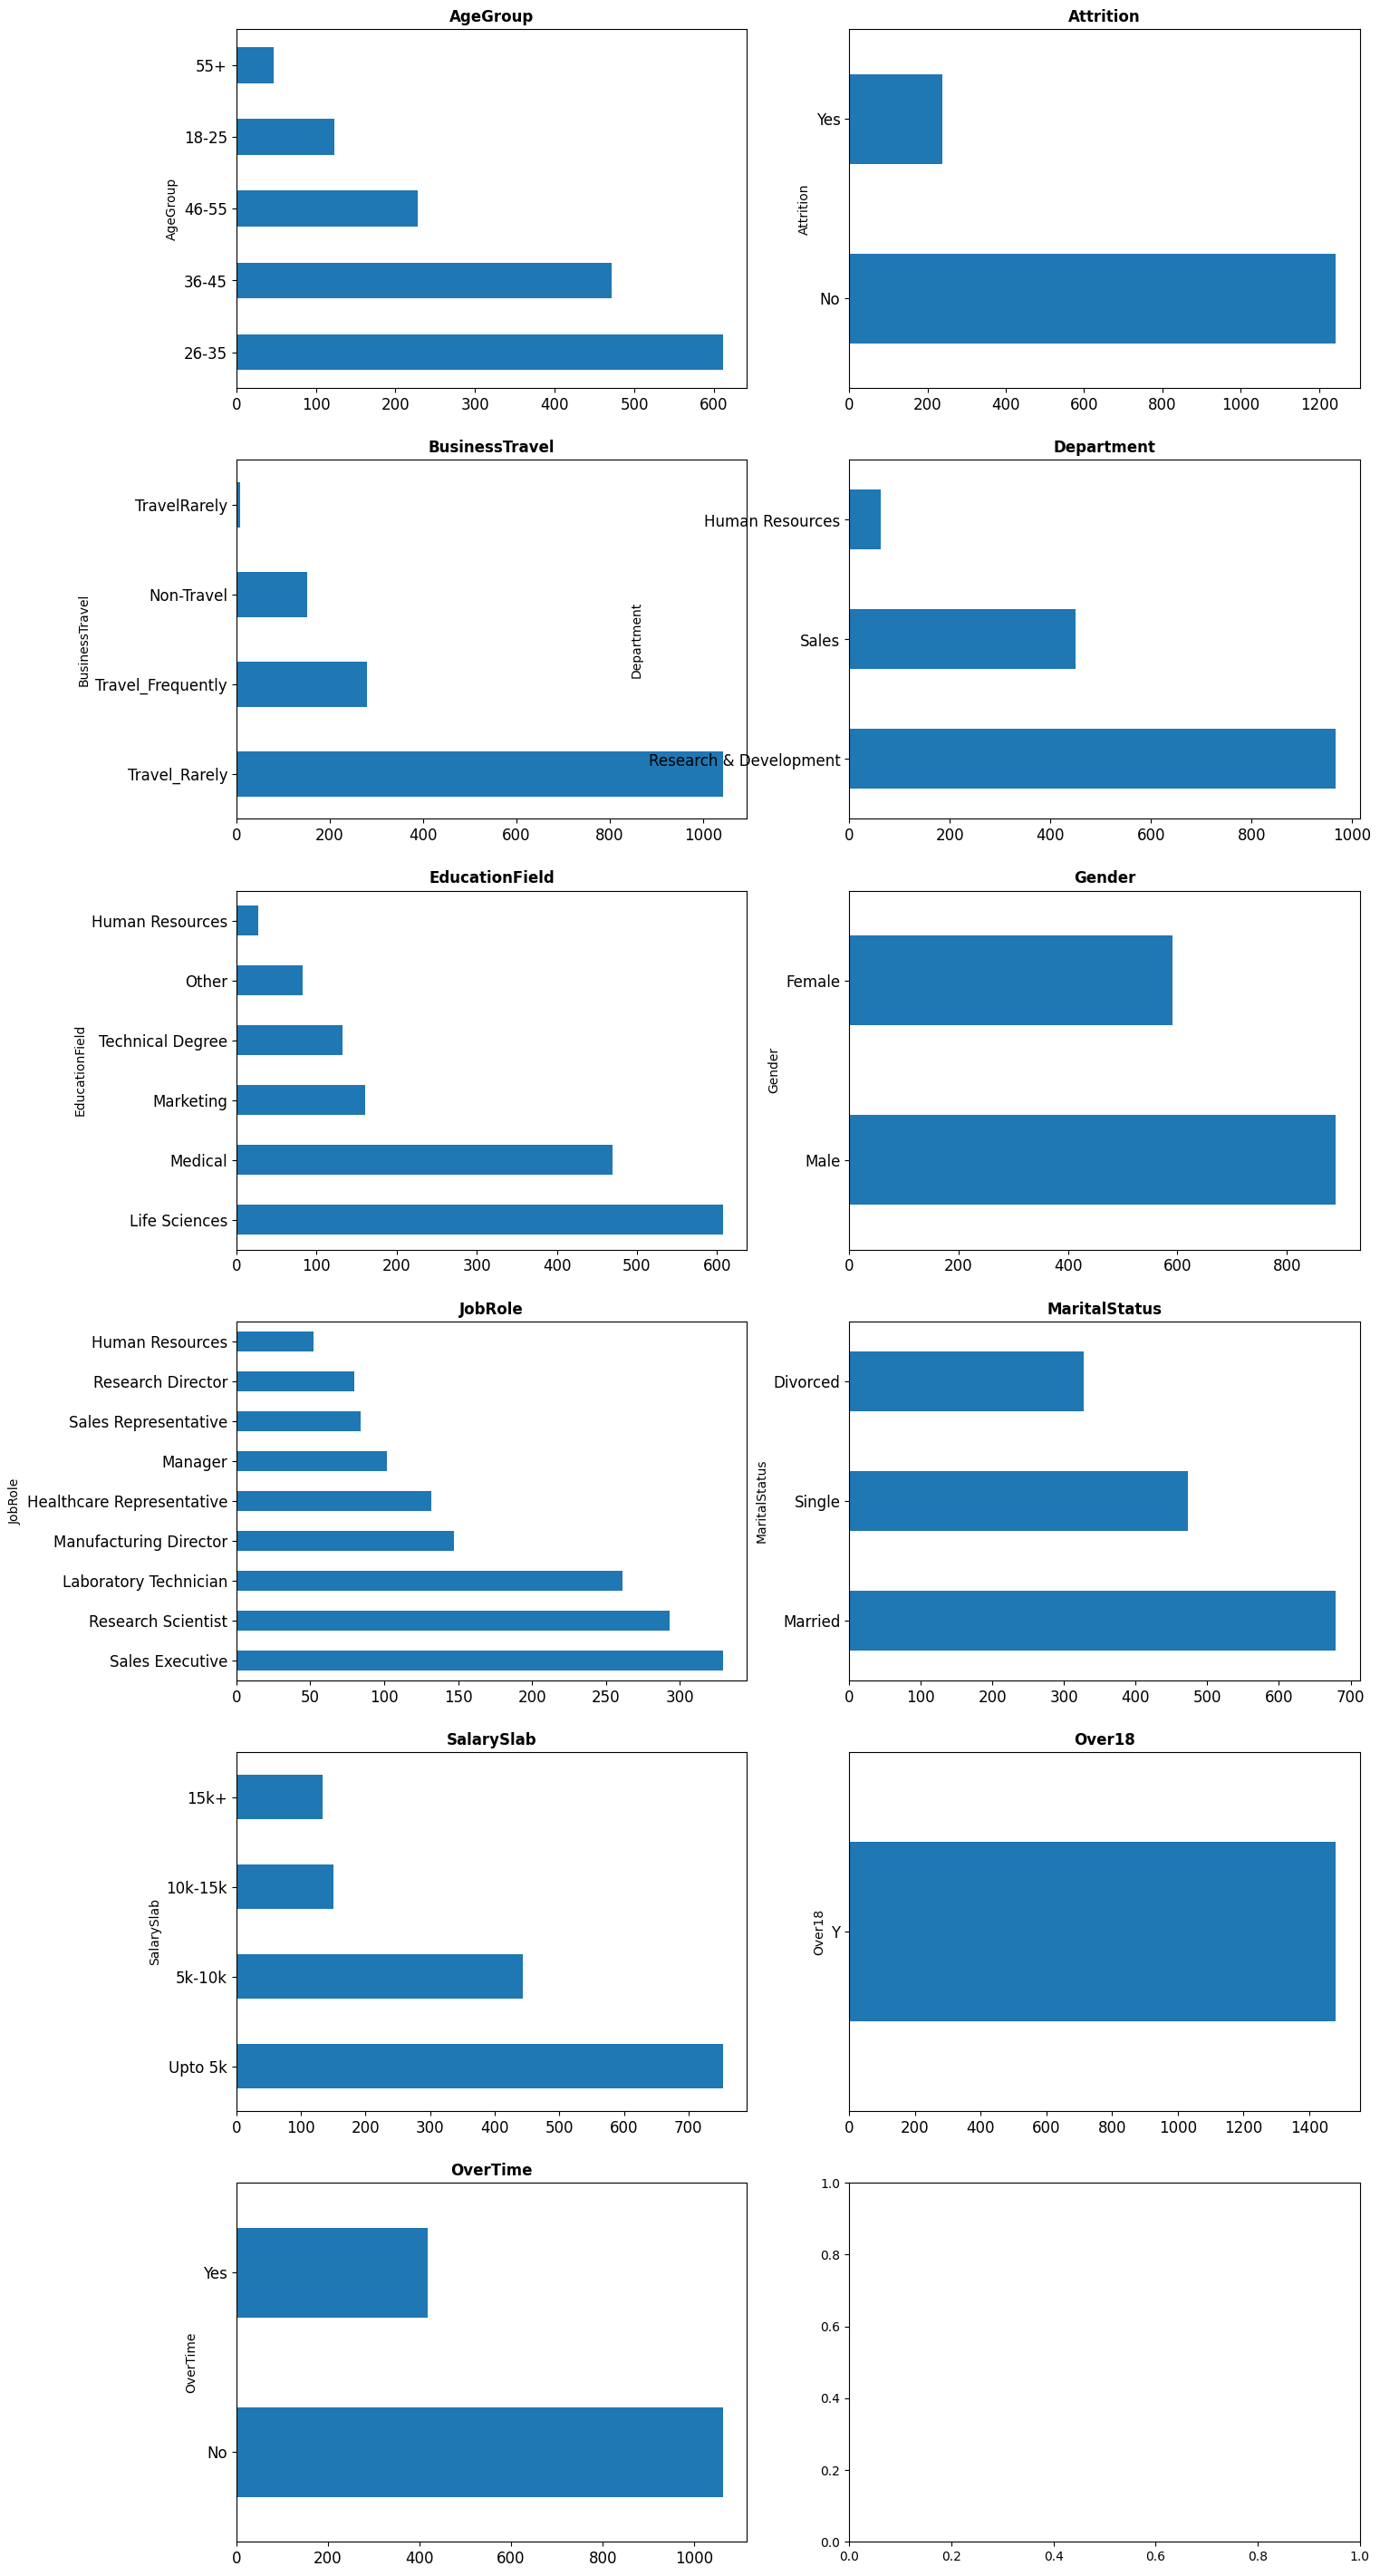

In [ ]:
graphics_eda(df.select_dtypes(include = 'object'))

Conclusions:
- 'Over18' --> Delete, has only one value

In [ ]:
df.drop(columns=['Over18'], inplace = True)
df

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,...,3,80,0,0,2,3,0,0,0,0.0
1,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,...,1,80,0,0,2,3,0,0,0,0.0
2,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,...,4,80,0,0,3,3,0,0,0,0.0
3,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,...,4,80,0,0,2,3,0,0,0,0.0
4,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,...,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,...,4,80,0,33,5,1,29,8,11,10.0
1476,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,...,4,80,0,22,5,4,18,13,13,11.0
1477,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,...,4,80,0,10,1,3,2,2,2,2.0
1478,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,1,...,2,80,1,12,3,3,11,7,1,9.0


In [ ]:
#The Travel Rarely and Travel Rarely values ​​in the BusinessTravel column are the same, they will be unified:
df['BusinessTravel'] = df['BusinessTravel'].replace({
    'travel_rarely': 'Travel_Rarely',
    'travel_frequently': 'Travel_Frequently',
    'Non-Travel': 'Non_Travel',
    'TravelRarely':'Travel_Rarely'
})
print(df['BusinessTravel'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non_Travel']


In [ ]:
#Transforms BusinessTravel and other categorical variables to numerical data
df['BusinessTravel'] = df.BusinessTravel.map({'Travel_Rarely': 1, 'Travel_Frequently': 2, 'Non-Travel': 3}).fillna(0).astype(int)
print(df['BusinessTravel'].unique())

[1 2 0]


###EDA OF NUMERICAL VARIABLES

In [ ]:
##Define the function to create the graphs of the variable data
def graphics_eda_numerical(num):

    # Calculate the number of rows
    num_cols = num.shape[1] if isinstance(num.shape[1], (int, float)) else 0
    rows = ceil(num_cols / 2)

    # Define the graph
    f, ax = plt.subplots(nrows=rows, ncols=2, figsize=(16, rows * 6))
    ax = ax.flat

    # Create the loop that adds graphics
    for each, variable in enumerate(num):
        ax[each].hist(num[variable].dropna(), bins=20)
        ax[each].set_title(variable, fontsize=12, fontweight="bold")
        ax[each].tick_params(labelsize=12)
        ax[each].set_xlabel(variable)

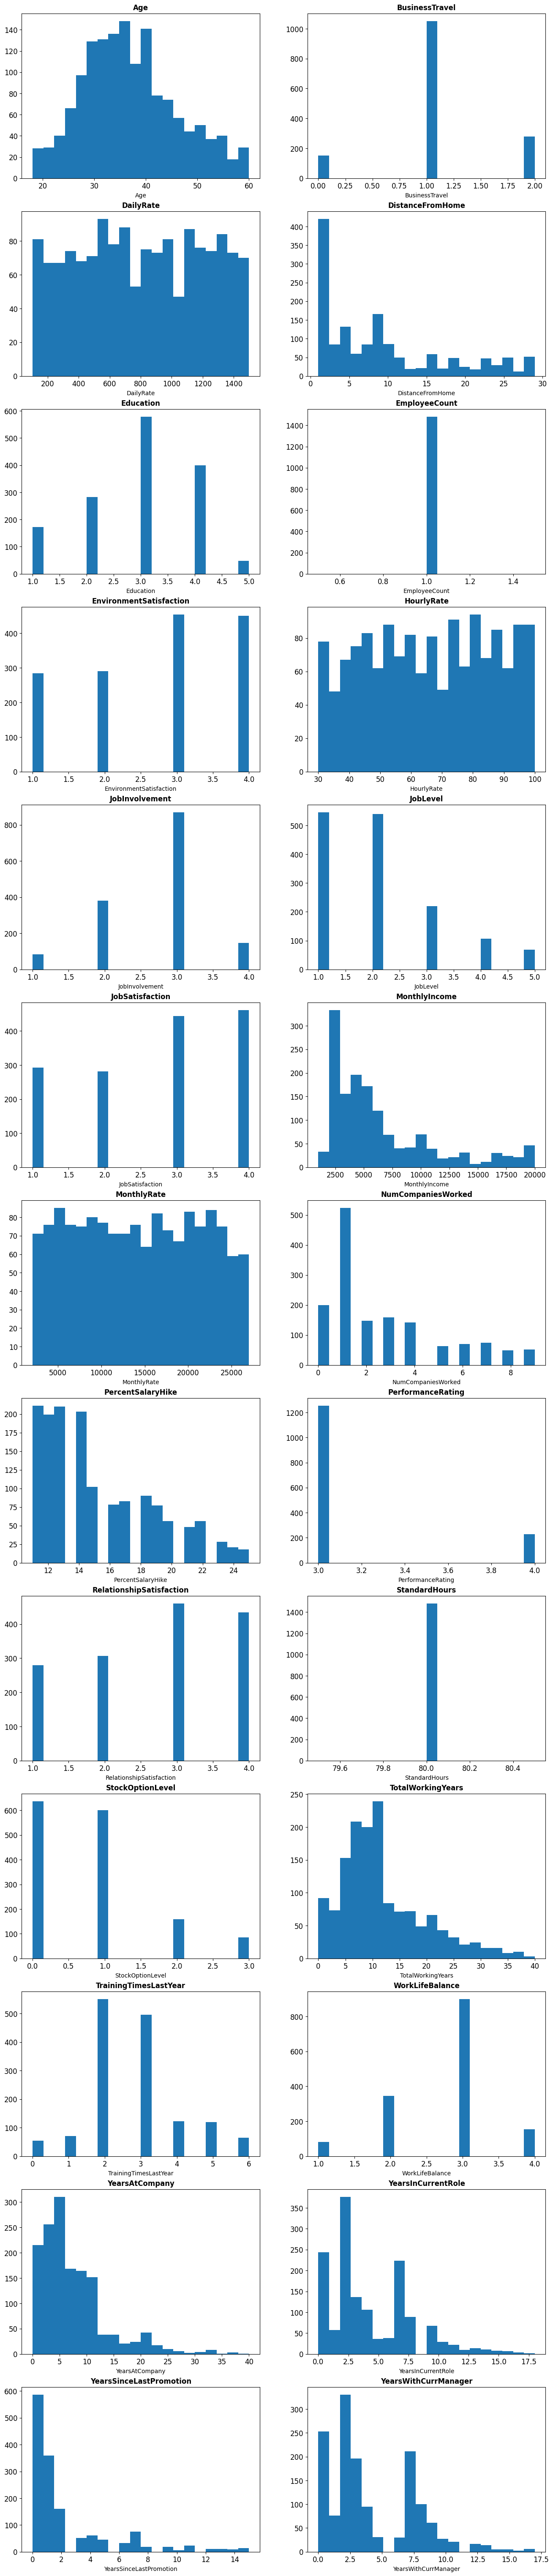

In [ ]:
#Get the numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

#Create a DataFrame with only the numeric columns
df_numeric = df[numeric_cols]

#Call the graphics_eda_numerical function with the numeric DataFrame
graphics_eda_numerical(df_numeric)

Conclusions:
- 'EmployeeCount', 'StandardHours' --> Delete, has only one value

In [ ]:
df.drop(columns=['EmployeeCount', 'StandardHours'],inplace = True)

In [ ]:
# Define the function to create the graphs of the numerical data
def statistics_cont(num):
    #calculate describe
    statistics = num.describe().T
    #Add the median
    statistics['median'] = num.median()
    #Rearrange so that the median is next to the mean
    statistics = statistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Return it
    return(statistics)

In [ ]:
statistics_cont(df.select_dtypes(include='number'))

,count,mean,median,std,min,25%,50%,75%,max
Age,1480.0,36.917568,36.0,9.128559,18.0,30.00,36.0,43.00,60.0
BusinessTravel,1480.0,1.086486,1.0,0.532214,0.0,1.00,1.0,1.00,2.0
DailyRate,1480.0,801.384459,800.0,403.126988,102.0,465.00,800.0,1157.00,1499.0
DistanceFromHome,1480.0,9.220270,7.0,8.131201,1.0,2.00,7.0,14.00,29.0
Education,1480.0,2.910811,3.0,1.023796,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1480.0,2.724324,3.0,1.092579,1.0,2.00,3.0,4.00,4.0
HourlyRate,1480.0,65.845270,66.0,20.328266,30.0,48.00,66.0,83.00,100.0
JobInvolvement,1480.0,2.729730,3.0,0.713007,1.0,2.00,3.0,3.00,4.0
JobLevel,1480.0,2.064865,2.0,1.105574,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1480.0,2.725000,3.0,1.104137,1.0,2.00,3.0,4.00,4.0


In [ ]:
#Number of employees who left
num_attrition = df['Attrition'].value_counts()['Yes']
#Total number of employees
total_employees = df.shape[0]
#Turnover rate
turnover_rate = (num_attrition / total_employees) * 100

print(f"Turnover rate: {turnover_rate:.2f}%")

Turnover rate: 16.08%


###Attrition by department

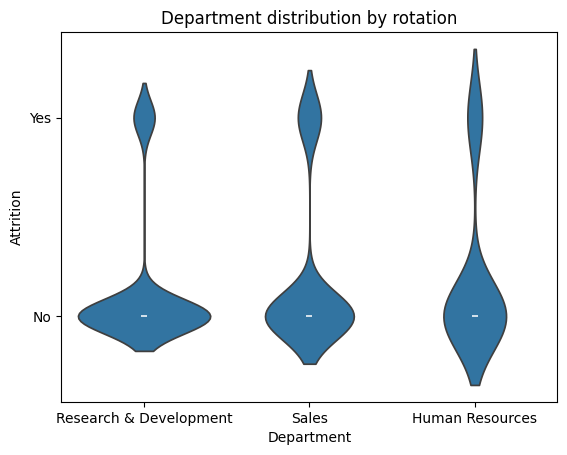

In [ ]:
#Violin graph
sns.violinplot(data=df, x='Department', y='Attrition')
plt.title('Department distribution by rotation')
plt.show()

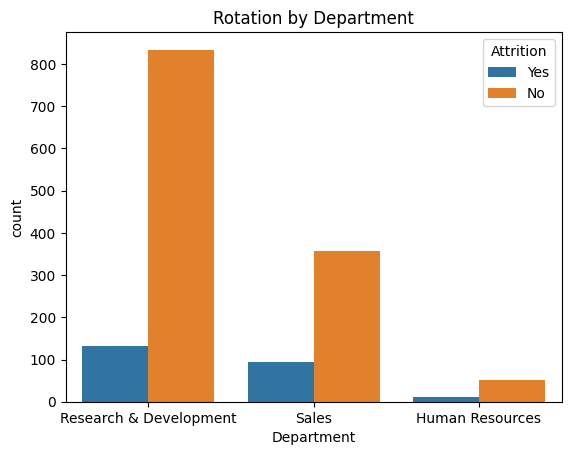

In [ ]:
#Bar graph
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Rotation by Department')
plt.show()

In [ ]:
#Chi square analysis
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Attrition'], df['Department'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-cuadrado: {chi2}, p-valor: {p}")

Chi-cuadrado: 11.303380312303572, p-valor: 0.003511576643584817


In [ ]:
 #Odd ratio analysis
 df['Attrition_binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})
 model = smf.logit("Attrition_binary ~ Department", data=df).fit()
 odds_ratios = np.exp(model.params)
 print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.437303
         Iterations 6
Intercept                               0.235294
Department[T.Research & Development]    0.677758
Department[T.Sales]                     1.107143
dtype: float64


###Attrition by OverTime

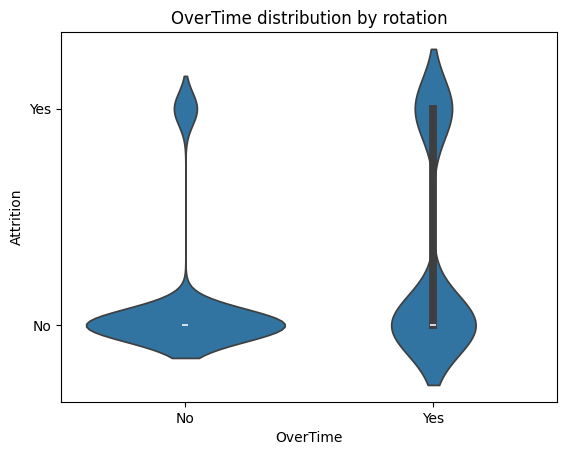

In [ ]:
#Violin graph
sns.violinplot(data=df, x='OverTime', y='Attrition')
plt.title('OverTime distribution by rotation')
plt.show()

In [ ]:
#Contingency table
overtime_table = pd.crosstab(df['Attrition'], df['OverTime'])
print(overtime_table)

OverTime    No  Yes
Attrition          
No         952  290
Yes        110  128


In [ ]:
#Chi square analysis
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(overtime_table)
print(f"Chi-square: {chi2}, p-value: {p}")

Chi-square: 89.77343842366878, p-value: 2.670556967205112e-21


In [ ]:
 #Odd ratio analysis
import statsmodels.formula.api as smf
model = smf.logit("Attrition_binary ~ OverTime", data=df).fit()
odds_ratios = np.exp(model.params)
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.412850
         Iterations 6
Intercept          0.115546
OverTime[T.Yes]    3.819937
dtype: float64


###Attrition by MonthlyIncome

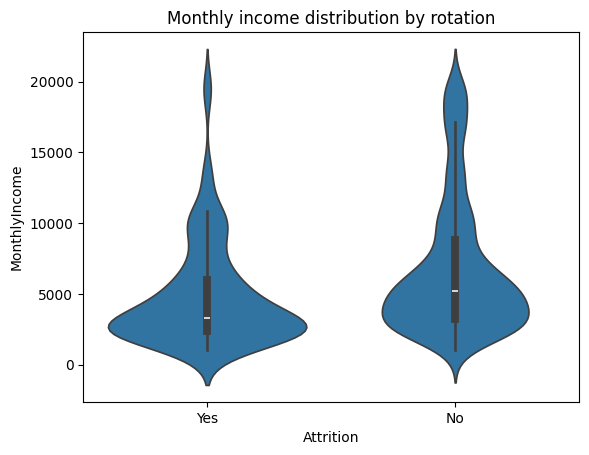

In [ ]:
#Violin graph
sns.violinplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly income distribution by rotation')
plt.show()

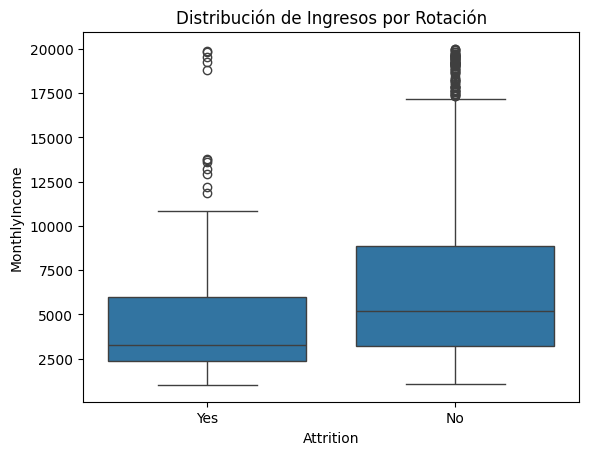

In [ ]:
#Boxplot
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly income distribution by rotation')
plt.show()

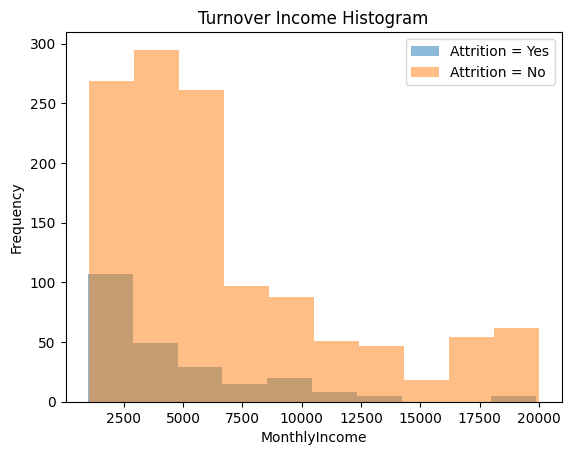

In [ ]:
#Histogram
plt.hist(df[df['Attrition'] == 'Yes']['MonthlyIncome'], alpha=0.5, label='Attrition = Yes')
plt.hist(df[df['Attrition'] == 'No']['MonthlyIncome'], alpha=0.5, label='Attrition = No')
plt.legend(loc='upper right')
plt.title('Turnover Income Histogram')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.show()

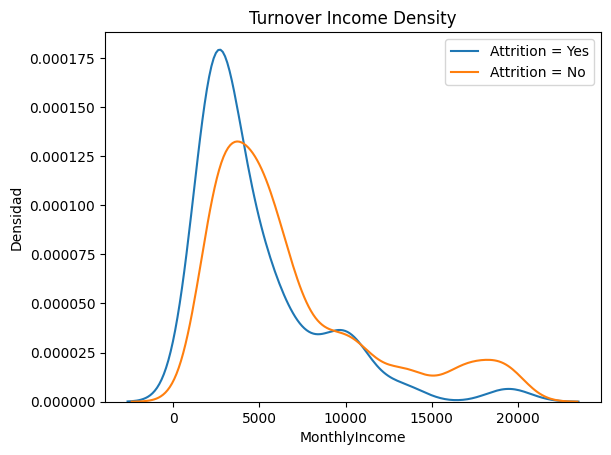

In [ ]:
#Density graph
sns.kdeplot(df[df['Attrition'] == 'Yes']['MonthlyIncome'], label='Attrition = Yes')
sns.kdeplot(df[df['Attrition'] == 'No']['MonthlyIncome'], label='Attrition = No')
plt.legend(loc='upper right')
plt.title('Turnover Income Density')
plt.xlabel('MonthlyIncome')
plt.ylabel('Density')
plt.show()

###Analize by YearsWithCurrManager

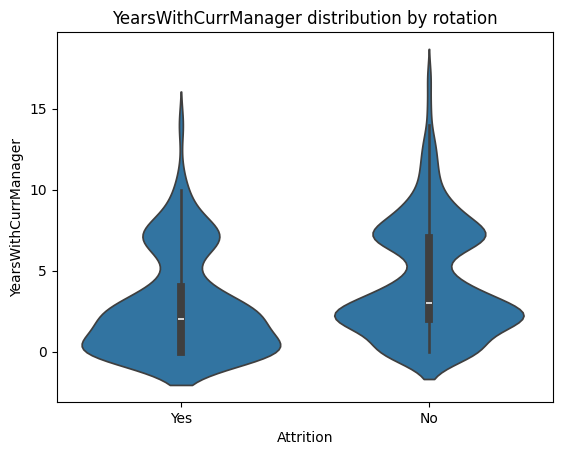

In [ ]:
#Violin graph
sns.violinplot(data=df, x='Attrition', y='YearsWithCurrManager')
plt.title('YearsWithCurrManager distribution by rotation')
plt.show()

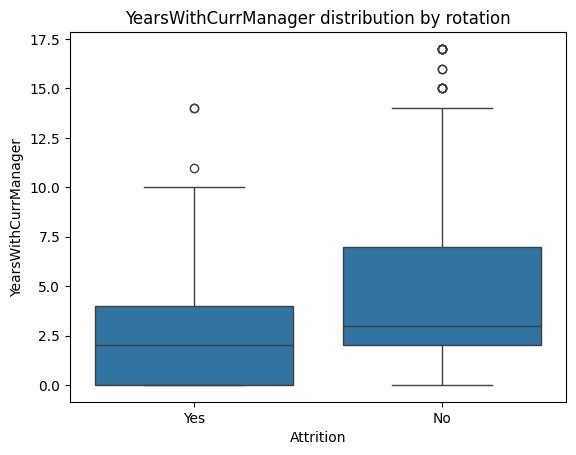

In [ ]:
#Boxplot
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df)
plt.title('YearsWithCurrManager distribution by rotation')
plt.show()

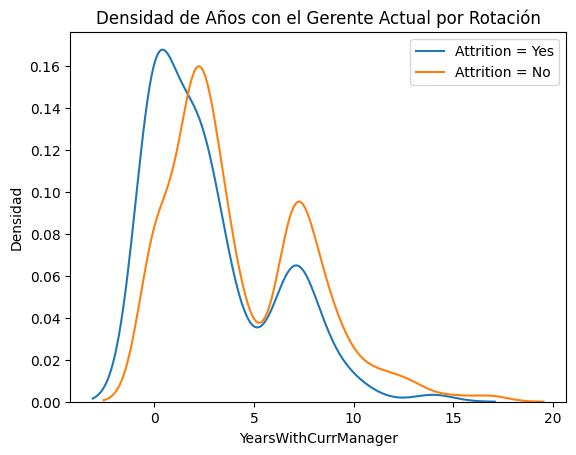

In [ ]:
#Density graph
sns.kdeplot(df[df['Attrition'] == 'Yes']['YearsWithCurrManager'], label='Attrition = Yes')
sns.kdeplot(df[df['Attrition'] == 'No']['YearsWithCurrManager'], label='Attrition = No')
plt.legend(loc='upper right')
plt.title('Density of Years with Current Manager by Rotation')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('Density')
plt.show()

###Analize YearsAtCompany

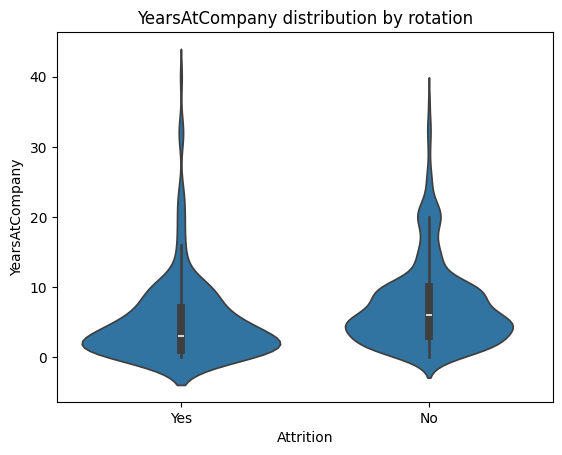

In [ ]:
#Violin graph
sns.violinplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('YearsAtCompany distribution by rotation')
plt.show()

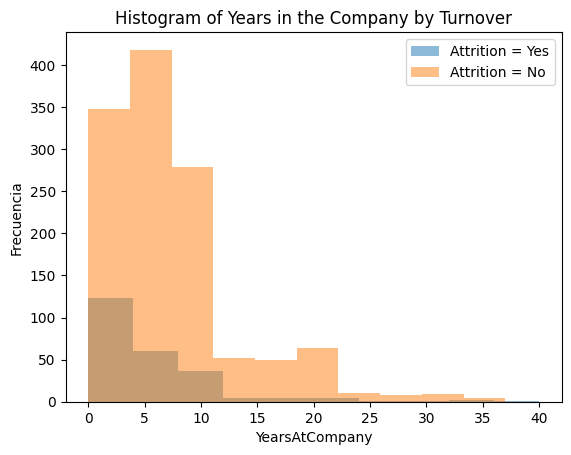

In [ ]:
#Histogram
plt.hist(df[df['Attrition'] == 'Yes']['YearsAtCompany'], alpha=0.5, label='Attrition = Yes')
plt.hist(df[df['Attrition'] == 'No']['YearsAtCompany'], alpha=0.5, label='Attrition = No')
plt.legend(loc='upper right')
plt.title('Histogram of Years in the Company by Turnover')
plt.xlabel('YearsAtCompany')
plt.ylabel('Frequency')
plt.show()

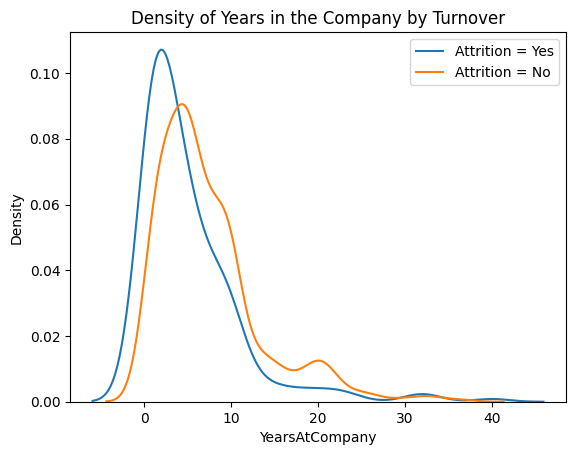

In [ ]:
#Density graph
sns.kdeplot(df[df['Attrition'] == 'Yes']['YearsAtCompany'], label='Attrition = Yes')
sns.kdeplot(df[df['Attrition'] == 'No']['YearsAtCompany'], label='Attrition = No')
plt.legend(loc='upper right')
plt.title('Density of Years in the Company by Turnover')
plt.xlabel('YearsAtCompany')
plt.ylabel('Density')
plt.show()

###Analize JobSatisfaction

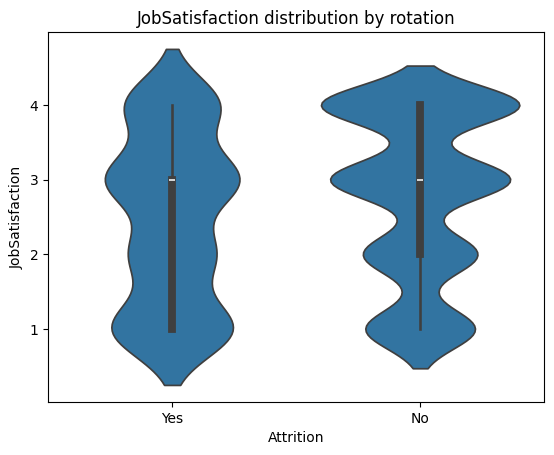

In [ ]:
#Violin graph
sns.violinplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('JobSatisfaction distribution by rotation')
plt.show()

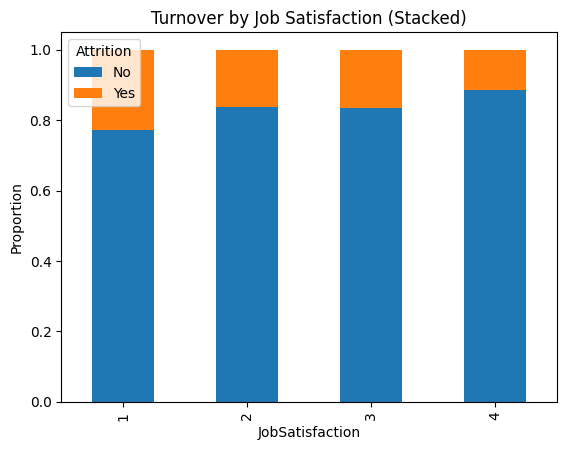

In [ ]:
#Create a contingency table
jobsat_table = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index')

#Create the stacked bar chart
jobsat_table.plot(kind='bar', stacked=True)
plt.title('Turnover by Job Satisfaction (Stacked)')
plt.xlabel('JobSatisfaction')
plt.ylabel('Proportion')
plt.show()

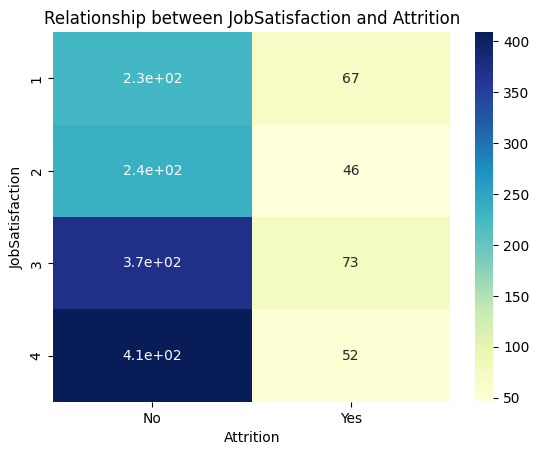

In [ ]:
#Create a contingency table
jobsat_table = pd.crosstab(df['JobSatisfaction'], df['Attrition'])

#Create the heatmap
sns.heatmap(jobsat_table, annot=True, cmap="YlGnBu")
plt.title('Relationship between JobSatisfaction and Attrition')
plt.show()

###Analize Education

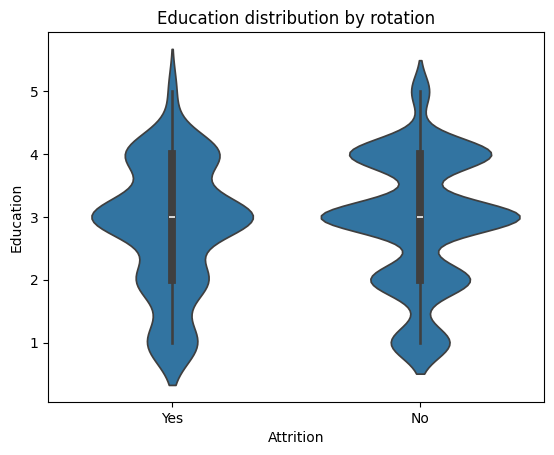

In [ ]:
#Violin graph
sns.violinplot(data=df, x='Attrition', y='Education')
plt.title('Education distribution by rotation')
plt.show()

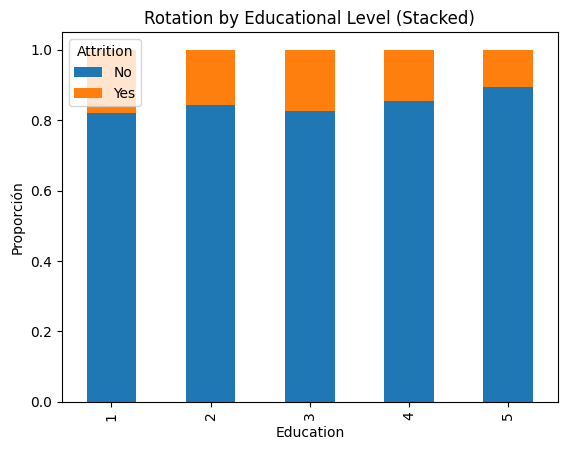

In [ ]:
#Create a contingency table
education_table = pd.crosstab(df['Education'], df['Attrition'], normalize='index')

#Create the stacked bar charts
education_table.plot(kind='bar', stacked=True)
plt.title('Rotation by Educational Level (Stacked)')
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.show()

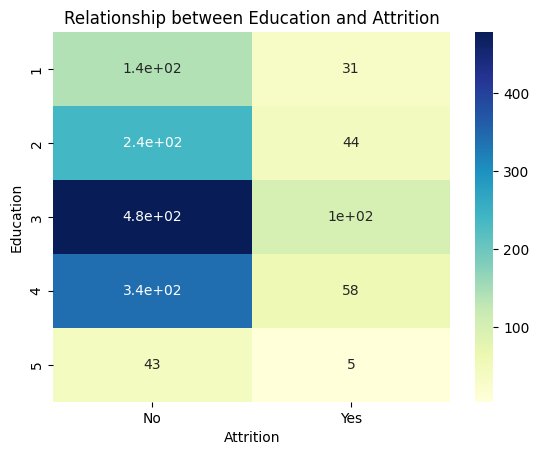

In [ ]:
#Create a contingency table
education_table = pd.crosstab(df['Education'], df['Attrition'])

#Create the heatmap
sns.heatmap(education_table, annot=True, cmap="YlGnBu")
plt.title('Relationship between Education and Attrition')
plt.show()

###Analize TotalWorkingYears

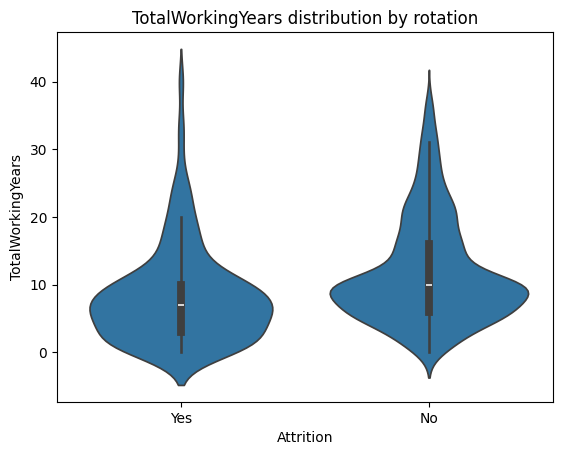

In [ ]:
#Violin graph
sns.violinplot(data=df, x='Attrition', y='TotalWorkingYears')
plt.title('TotalWorkingYears distribution by rotation')
plt.show()

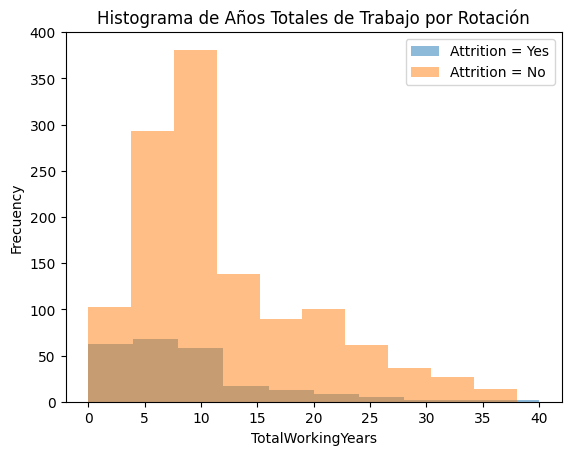

In [ ]:
#Histogram
plt.hist(df[df['Attrition'] == 'Yes']['TotalWorkingYears'], alpha=0.5, label='Attrition = Yes')
plt.hist(df[df['Attrition'] == 'No']['TotalWorkingYears'], alpha=0.5, label='Attrition = No')
plt.legend(loc='upper right')
plt.title('Histogram of Total Years of Work per Turnover')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Frecuency')
plt.show()

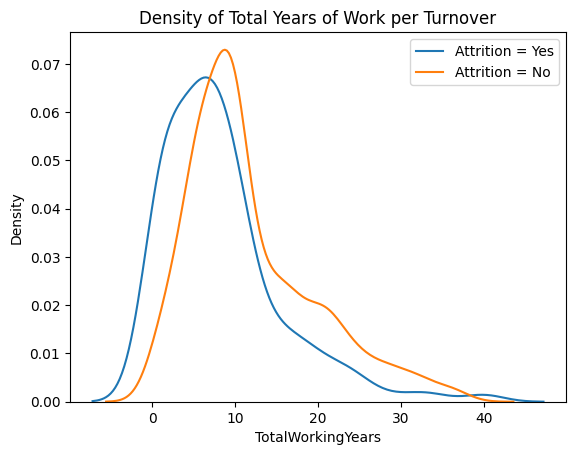

In [ ]:
#Density graph
sns.kdeplot(df[df['Attrition'] == 'Yes']['TotalWorkingYears'], label='Attrition = Yes')
sns.kdeplot(df[df['Attrition'] == 'No']['TotalWorkingYears'], label='Attrition = No')
plt.legend(loc='upper right')
plt.title('Density of Total Years of Work per Turnover')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Density')
plt.show()

###Analize YearsInCurrentRole

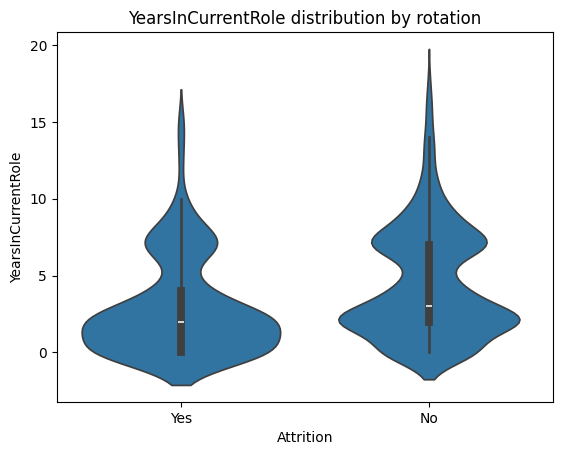

In [ ]:
#Violin graph
sns.violinplot(data=df, x='Attrition', y='YearsInCurrentRole')
plt.title('YearsInCurrentRole distribution by rotation')
plt.show()

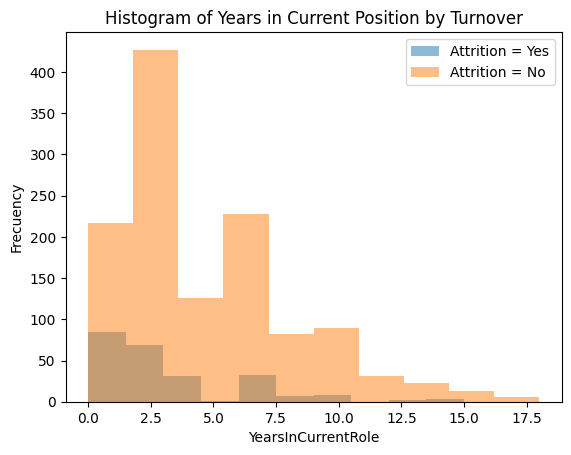

In [ ]:
#Histogram
plt.hist(df[df['Attrition'] == 'Yes']['YearsInCurrentRole'], alpha=0.5, label='Attrition = Yes')
plt.hist(df[df['Attrition'] == 'No']['YearsInCurrentRole'], alpha=0.5, label='Attrition = No')
plt.legend(loc='upper right')
plt.title('Histogram of Years in Current Position by Turnover')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Frecuency')
plt.show()

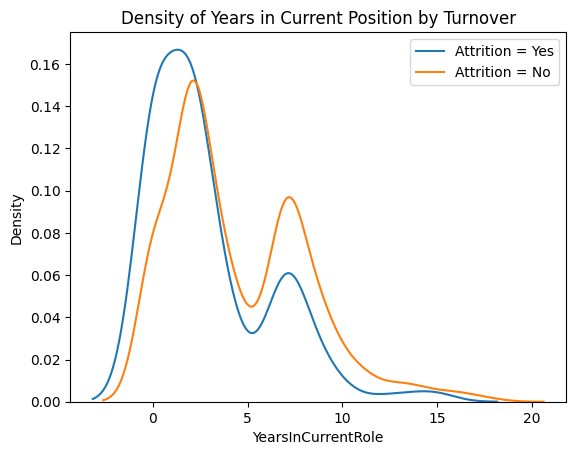

In [ ]:
#Density graph
sns.kdeplot(df[df['Attrition'] == 'Yes']['YearsInCurrentRole'], label='Attrition = Yes')
sns.kdeplot(df[df['Attrition'] == 'No']['YearsInCurrentRole'], label='Attrition = No')
plt.legend(loc='upper right')
plt.title('Density of Years in Current Position by Turnover')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Density')
plt.show()

###Conclusions:


- Department: The 'Sales' department shows a higher attrition rate compared to other departments, especially in relation to 'Human Resources'.
- OverTime: Employees who work overtime ('OverTime' = Yes) have a significantly higher probability of leaving the company.
- MonthlyIncome: Employees with lower monthly income tend to have a higher attrition rate. There is a higher concentration of employees who left in the lower income ranges.
- YearsWithCurrManager: Employees with fewer years with their current manager, especially those with 0-2 years, have a higher probability of attrition.
- YearsAtCompany: Employees with fewer years at the company, particularly those with 1-5 years and 10-15 years, show a higher attrition rate.
- JobSatisfaction: Job satisfaction seems to influence attrition. Employees with lower job satisfaction (levels 1 and 2) have a higher probability of leaving the company.
- Education: Education level does not show a clear relationship with attrition, although employees with lower education levels (1 and 2) might have a slight tendency towards higher attrition.
- TotalWorkingYears: Similar to 'YearsAtCompany', employees with fewer total years of work experience tend to have a higher attrition rate.

###Profile of the worker most likely to experience attrition:



Based on the conclusions above, we can build a profile of the worker most likely to experience attrition:

- Department: 'Sales'
- OverTime: Yes
- MonthlyIncome: Low (especially in the lower ranges)
- YearsWithCurrManager: Low (0-2 years)
- YearsAtCompany: Low (1-5 years or 10-15 years)
- JobSatisfaction: Low (levels 1 and 2)
- Education: Could be low (levels 1 and 2), but the relationship is not as strong as with other variables.
- TotalWorkingYears: Low

In summary, the worker most likely to experience attrition is one who works in the 'Sales' department, works overtime, has a low monthly income, has few years with their current manager and at the company, has low job satisfaction, and possibly a low education level.

Remember that this is a general profile and attrition can be influenced by other factors not considered in this analysis. It is important to further investigate the specific causes of attrition in your company to develop more effective retention strategies